<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_09_IAckathon_Anomalias/blob/main/scripts/importar_unir_eda_pruebaModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install skimpy

In [ ]:
!pip install -U dataprep

In [3]:
from skimpy import skim
from dataprep.eda import create_report

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [5]:
from textwrap import TextWrapper

In [6]:
''' Esta funcion es una utilitaria para imprimir los nombres de columnas y
que no toque hacer desplazamiento horizontal'''
# wrapper = textwrap.TextWrapper(width=100)
wrapper = TextWrapper(width=100)

## Datos

### Descargar datos

In [7]:
#https://docs.google.com/spreadsheets/d/16xhN600OTMNlhNuXPQFCsDxbhdnyliGS
!gdown --id 16xhN600OTMNlhNuXPQFCsDxbhdnyliGS

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16xhN600OTMNlhNuXPQFCsDxbhdnyliGS
To: /content/releases_2022.xlsx
100% 62.6M/62.6M [00:01<00:00, 38.3MB/s]


In [8]:
releases = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Releases' )

In [9]:
releases.rename(columns={"id": "release_id"}, inplace= True)

In [10]:
releases.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag'],
      dtype='object')

In [11]:
planning = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Planning' )

In [12]:
planning.rename(columns={"id": "planning_id"}, inplace= True)

In [13]:
planning.columns

Index(['ocid', 'planning_id', 'rationale', 'budget_id', 'budget_description',
       'budget_amount', 'budget_currency'],
      dtype='object')

In [14]:
tender = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Tender' )

In [15]:
tender.rename(columns={"id": "tender_id"}, inplace= True)

In [16]:
tender.columns

Index(['ocid', 'release_id', 'tender_id', 'title', 'description', 'status',
       'procuringEntity_id', 'procuringEntity_name', 'value_amount',
       'value_currency', 'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers'],
      dtype='object')

In [17]:
awards = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Awards' )

In [18]:
awards.rename(columns={"id": "award_id"}, inplace= True)

In [19]:
awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays'],
      dtype='object')

In [20]:
award_supp = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'AwardSuppliers' )

In [21]:
award_supp.rename(columns={"id": "award_supp_id"}, inplace= True)

In [22]:
award_supp.columns

Index(['ocid', 'release_id', 'award_id', 'award_supp_id', 'name'], dtype='object')

In [23]:
contracts = pd.read_excel("/content/releases_2022.xlsx", sheet_name= 'Contracts' )

In [24]:
contracts.rename(columns={"id": "contracts_id", "awardID": "award_id"}, inplace= True)

In [25]:
contracts.columns

Index(['ocid', 'release_id', 'contracts_id', 'award_id', 'title',
       'description', 'status', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'amount', 'currency', 'dateSigned'],
      dtype='object')

### Entender y corregir Datos

#### Verificar unicos ocid

In [26]:
def colSoloUnicos(dataframe, columna):
    """
    Verifica si la columna especificada tiene solo valores únicos.

    Parámetros:
    dataframe (pandas.DataFrame): El DataFrame que contiene la columna.
    columna (str): El nombre de la columna a verificar.

    Retorna:
    bool: True si la columna tiene solo valores únicos, False en caso contrario.
    """
    # Comprueba si el número de valores únicos es igual al número total de filas
    return dataframe[columna].nunique() == dataframe[columna].count()


In [27]:
for df in [releases, planning, tender, awards, award_supp, contracts]:
  print( colSoloUnicos(df, 'ocid') )

True
True
True
False
False
False


In [28]:
for df in [releases, tender, awards, award_supp, contracts]:
  print( colSoloUnicos(df, 'release_id') )

True
True
False
False
False


In [29]:
for df, col in zip([releases, planning, tender, awards, award_supp, contracts], ['release_id', 'planning_id', 'tender_id', 'award_id', 'award_supp_id', 'contracts_id']):
  print( colSoloUnicos(df, col) )

True
True
True
False
False
False


Puedes existir varios awards por cada ocid

In [30]:
awards.groupby('ocid')['award_id'].size().reset_index(name='N').sort_values("N", ascending= False)

ocid    N
144099      ocds-5wno2w-MCB-GADPE-02-2022-32109  164
144094     ocds-5wno2w-MCB-GADMT-115-2022-36463  106
144074   ocds-5wno2w-MCB-GADMN-CP005-2022-76661  105
144054    ocds-5wno2w-MCB-EPMRQ-001-2022-289323  104
144118  ocds-5wno2w-MCB-GADPRSI-005-2022-128299  102
...                                         ...  ...
60100      ocds-5wno2w-CE-20220002206268-534507    1
60101      ocds-5wno2w-CE-20220002206269-534507    1
60102      ocds-5wno2w-CE-20220002206270-534507    1
60103      ocds-5wno2w-CE-20220002206271-534507    1
180293      ocds-5wno2w-sie-hial-0124-2022-8458    1

[180294 rows x 2 columns]

Y varios ocid por award

In [31]:
awards.groupby('award_id')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

award_id  N
144889  CE-20220002265567  3
171874  CE-20220002301973  3
171872  CE-20220002301971  3
171871  CE-20220002301970  3
171870  CE-20220002301969  3
...                   ... ..
60860   CE-20220002146540  1
60861   CE-20220002146541  1
60862   CE-20220002146542  1
60863   CE-20220002146543  1
182572  CE-20220002320613  1

[182573 rows x 2 columns]

In [32]:
awards.loc[awards['award_id']=='CE-20220002265567']

ocid  \
162314         ocds-5wno2w-CE-20220002265567-431380   
176406  ocds-5wno2w-CE-20220002265567-1160054330001   
177215        ocds-5wno2w-CE-20220002265567-1124762   

                                               release_id           award_id  \
162314  CE-20220002265567-431380-2022-12-21T08:20:09.650Z  CE-20220002265567   
176406  CE-20220002265567-1160054330001-2023-01-18T08:...  CE-20220002265567   
177215  CE-20220002265567-1124762-2023-01-20T08:21:14....  CE-20220002265567   

        title description  status date   amount currency  \
162314    NaN         NaN  active  NaN  3.18976      USD   
176406    NaN         NaN  active  NaN  3.18976      USD   
177215    NaN         NaN  active  NaN  3.18976      USD   

        correctedValue_amount  correctedValue_currency  enteredValue_amount  \
162314                    NaN                      NaN                  NaN   
176406                    NaN                      NaN                  NaN   
177215                    NaN                      NaN                  NaN   

        enteredValue_currency contractPeriod_startDate contractPeriod_endDate  \
162314                    NaN                      NaN                    NaN   
176406                    NaN                      NaN                    NaN   
177215                    NaN                      NaN                    NaN   

        contractPeriod_maxExtentDate  contractPeriod_durationInDays  
162314                           NaN                            NaN  
176406                           NaN                            NaN  
177215                           NaN                            NaN

In [33]:
tender.loc[tender['ocid'].isin(awards.loc[awards['award_id']=='CE-20220002265567']['ocid'])]

ocid  \
165306         ocds-5wno2w-CE-20220002265567-431380   
179673  ocds-5wno2w-CE-20220002265567-1160054330001   
180497        ocds-5wno2w-CE-20220002265567-1124762   

                                               release_id  \
165306  CE-20220002265567-431380-2022-12-21T08:20:09.650Z   
179673  CE-20220002265567-1160054330001-2023-01-18T08:...   
180497  CE-20220002265567-1124762-2023-01-20T08:21:14....   

                              tender_id                              title  \
165306         CE-20220002265567-431380  Orden de compra CE-20220002265567   
179673  CE-20220002265567-1160054330001  Orden de compra CE-20220002265567   
180497        CE-20220002265567-1124762  Orden de compra CE-20220002265567   

                                              description    status  \
165306  Orden de compra para adquirir los siguientes p...  complete   
179673  Orden de compra para adquirir los siguientes p...  complete   
180497  Orden de compra para adquirir los siguientes p...  complete   

                  procuringEntity_id  \
165306   EC-RUC-1160054330001-431380   
179673                           NaN   
180497  EC-RUC-1160054330001-1124762   

                                     procuringEntity_name  value_amount  \
165306  MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...       3.18976   
179673                                                NaN       3.18976   
180497  MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...       3.18976   

       value_currency  ... enquiryPeriod_endDate enquiryPeriod_maxExtentDate  \
165306            USD  ...                   NaN                         NaN   
179673            USD  ...                   NaN                         NaN   
180497            USD  ...                   NaN                         NaN   

       enquiryPeriod_durationInDays hasEnquiries eligibilityCriteria  \
165306                          NaN          NaN                 NaN   
179673                          NaN          NaN                 NaN   
180497                          NaN          NaN                 NaN   

       awardPeriod_startDate awardPeriod_endDate  awardPeriod_maxExtentDate  \
165306                   NaN                 NaN                        NaN   
179673                   NaN                 NaN                        NaN   
180497                   NaN                 NaN                        NaN   

       awardPeriod_durationInDays numberOfTenderers  
165306                        NaN               NaN  
179673                        NaN               NaN  
180497                        NaN               NaN  

[3 rows x 29 columns]

In [34]:
planning.loc[planning['ocid'].isin(awards.loc[awards['award_id']=='CE-20220002265567']['ocid'])]

Empty DataFrame
Columns: [ocid, planning_id, rationale, budget_id, budget_description, budget_amount, budget_currency]
Index: []

In [35]:
releases.loc[releases['ocid'].isin(awards.loc[awards['award_id']=='CE-20220002265567']['ocid'])]

ocid  \
174075         ocds-5wno2w-CE-20220002265567-431380   
189069  ocds-5wno2w-CE-20220002265567-1160054330001   
189893        ocds-5wno2w-CE-20220002265567-1124762   

                                               release_id initiationType  \
174075  CE-20220002265567-431380-2022-12-21T08:20:09.650Z         tender   
189069  CE-20220002265567-1160054330001-2023-01-18T08:...         tender   
189893  CE-20220002265567-1124762-2023-01-20T08:21:14....         tender   

                    buyer_id  \
174075  EC-RUC-1160054330001   
189069  EC-RUC-1160054330001   
189893  EC-RUC-1160054330001   

                                               buyer_name language  \
174075  MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...       es   
189069  MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...       es   
189893  MANCOMUNIDAD DE MUNICIPALIDADES DEL SUROCCIDEN...       es   

                             date                            tag  
174075  2022-09-06T00:00:00-05:00  ["tender","award","contract"]  
189069  2022-09-06T00:00:00-05:00  ["tender","award","contract"]  
189893  2022-09-06T00:00:00-05:00  ["tender","award","contract"]

In [36]:
## Parece ser que la combinación 'ocid', 'award_id' es única
awards.groupby(['ocid', 'award_id'])[['title']].size().reset_index(name='N').sort_values("N", ascending= False)

ocid                     award_id  N
0       ocds-5wno2w-.MCO-GADMP-05-2022.-27207  5792228-.MCO-GADMP-05-2022.  1
121842   ocds-5wno2w-CE-20220002292353-479937            CE-20220002292353  1
121822     ocds-5wno2w-CE-20220002292331-2547            CE-20220002292331  1
121823    ocds-5wno2w-CE-20220002292334-30573            CE-20220002292334  1
121824    ocds-5wno2w-CE-20220002292335-30573            CE-20220002292335  1
...                                       ...                          ... ..
60914    ocds-5wno2w-CE-20220002207555-258814            CE-20220002207555  1
60915    ocds-5wno2w-CE-20220002207556-258814            CE-20220002207556  1
60916    ocds-5wno2w-CE-20220002207557-258814            CE-20220002207557  1
60917    ocds-5wno2w-CE-20220002207558-258814            CE-20220002207558  1
182739    ocds-5wno2w-sie-hial-0124-2022-8458   2045576-sie-hial-0124-2022  1

[182740 rows x 3 columns]

In [37]:
award_supp.groupby('award_supp_id')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

award_supp_id      N
17091     EC-RUC-1790732657001-2854  54474
17309     EC-RUC-1791362160001-5430   4687
18006   EC-RUC-1792385512001-485219   3350
17707   EC-RUC-1792092108001-168552   3193
15626    EC-RUC-1713823365001-52654   2979
...                             ...    ...
9462    EC-RUC-1003777180001-946151      1
9463   EC-RUC-1003859517001-1102017      1
9465    EC-RUC-1003887492001-974737      1
9466    EC-RUC-1003888862001-739700      1
21421          ID-B91424325-1086283      1

[21422 rows x 2 columns]

In [38]:
award_supp.groupby(['ocid', 'award_id'])[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

ocid                     award_id  N
0       ocds-5wno2w-.MCO-GADMP-05-2022.-27207  5792228-.MCO-GADMP-05-2022.  1
121842   ocds-5wno2w-CE-20220002292353-479937            CE-20220002292353  1
121822     ocds-5wno2w-CE-20220002292331-2547            CE-20220002292331  1
121823    ocds-5wno2w-CE-20220002292334-30573            CE-20220002292334  1
121824    ocds-5wno2w-CE-20220002292335-30573            CE-20220002292335  1
...                                       ...                          ... ..
60914    ocds-5wno2w-CE-20220002207555-258814            CE-20220002207555  1
60915    ocds-5wno2w-CE-20220002207556-258814            CE-20220002207556  1
60916    ocds-5wno2w-CE-20220002207557-258814            CE-20220002207557  1
60917    ocds-5wno2w-CE-20220002207558-258814            CE-20220002207558  1
182739    ocds-5wno2w-sie-hial-0124-2022-8458   2045576-sie-hial-0124-2022  1

[182740 rows x 3 columns]

In [39]:
contracts.groupby('ocid')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

ocid    N
141384     ocds-5wno2w-MCB-GADPE-02-2022-32109  164
141380    ocds-5wno2w-MCB-GADMT-115-2022-36463  106
141364  ocds-5wno2w-MCB-GADMN-CP005-2022-76661  105
141350   ocds-5wno2w-MCB-EPMRQ-001-2022-289323  104
141323    ocds-5wno2w-MCB-CCFFAA-003-2022-2539   85
...                                        ...  ...
56466      ocds-5wno2w-CE-20220002202325-41357    1
56467      ocds-5wno2w-CE-20220002202326-41357    1
56468      ocds-5wno2w-CE-20220002202327-41357    1
56469       ocds-5wno2w-CE-20220002202328-2539    1
169393     ocds-5wno2w-sie-hial-0124-2022-8458    1

[169394 rows x 2 columns]

In [40]:
contracts.groupby('contracts_id')[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

contracts_id  N
160427  CE-20220002301965-contract  3
87347   CE-20220002199484-contract  3
36335   CE-20220002127957-contract  3
138657  CE-20220002272444-contract  3
142835  CE-20220002277766-contract  3
...                            ... ..
57045   CE-20220002157301-contract  1
57046   CE-20220002157302-contract  1
57047   CE-20220002157303-contract  1
57048   CE-20220002157304-contract  1
171133  CE-20220002320613-contract  1

[171134 rows x 2 columns]

In [41]:
contracts.groupby(['ocid', 'award_id'])[['ocid']].size().reset_index(name='N').sort_values("N", ascending= False)

ocid                      award_id  \
144296  ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950  5769585-MCO-ETPMM-EP-04-2022   
154365      ocds-5wno2w-SIE-1BI-004-2022-103880      2029554-SIE-1BI-004-2022   
139953     ocds-5wno2w-COTS-SZE-001-2022-110642     5362321-COTS-SZE-001-2022   
143621    ocds-5wno2w-MCO-BALAG-003-2022-108230    5874765-MCO-BALAG-003-2022   
146922    ocds-5wno2w-MCS-ARCFIZ-05-2022-869714    5582492-MCS-ARCFIZ-05-2022   
...                                         ...                           ...   
57099      ocds-5wno2w-CE-20220002203269-480811             CE-20220002203269   
57100      ocds-5wno2w-CE-20220002203270-480811             CE-20220002203270   
57101      ocds-5wno2w-CE-20220002203271-480811             CE-20220002203271   
57102      ocds-5wno2w-CE-20220002203272-480811             CE-20220002203272   
171294      ocds-5wno2w-sie-hial-0124-2022-8458    2045576-sie-hial-0124-2022   

        N  
144296  2  
154365  2  
139953  2  
143621  2  
146922  2  
...    ..  
57099   1  
57100   1  
57101   1  
57102   1  
171294  1  

[171295 rows x 3 columns]

In [42]:
contracts.loc[ (contracts['ocid']== 'ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950') & (contracts['award_id']== '5769585-MCO-ETPMM-EP-04-2022' )]

ocid  \
77285  ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950   
77286  ocds-5wno2w-MCO-ETPMM-EP-04-2022-250950   

                                              release_id  \
77285  MCO-ETPMM-EP-04-2022-250950-2023-01-17T09:55:2...   
77286  MCO-ETPMM-EP-04-2022-250950-2023-01-17T09:55:2...   

                       contracts_id                      award_id  title  \
77285  2134621-MCO-ETPMM-EP-04-2022  5769585-MCO-ETPMM-EP-04-2022    NaN   
77286  2152442-MCO-ETPMM-EP-04-2022  5769585-MCO-ETPMM-EP-04-2022    NaN   

       description      status   contractPeriod_startDate  \
77285          NaN  terminated  2022-09-27T00:00:00-05:00   
77286          NaN  terminated  2022-12-14T00:00:00-05:00   

          contractPeriod_endDate  contractPeriod_maxExtentDate  \
77285  2022-10-27T00:00:00-05:00                           NaN   
77286  2022-12-19T00:00:00-05:00                           NaN   

       contractPeriod_durationInDays    amount currency  \
77285                           30.0  19861.37      USD   
77286                            5.0   5000.00      USD   

                      dateSigned  
77285  2022-09-13T00:00:00-05:00  
77286  2022-12-14T00:00:00-05:00

#### Unir datos

In [162]:
base = releases.merge(planning, how= 'outer', on= 'ocid')
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency'],
      dtype='object')

In [163]:
base = base.merge(tender, how= 'outer', on= ['ocid', 'release_id'])

In [164]:
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title', 'description', 'status', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers'],
      dtype='object')

In [165]:
contr_award = contracts.groupby(['ocid', 'award_id']).agg({'amount': 'sum', 'contracts_id': 'size', 'contractPeriod_durationInDays': 'sum'}).reset_index()
contr_award.rename(columns={'amount': 'sum_contr', 'contracts_id': 'n_contr', 'contractPeriod_durationInDays': 'durac_cont_tot'}, inplace= True)

In [166]:
contr_award

ocid                      award_id  \
0         ocds-5wno2w-.MCO-GADMP-05-2022.-27207   5792228-.MCO-GADMP-05-2022.   
1          ocds-5wno2w-001-CDC-CCENL-2022-81401    5688371-001-CDC-CCENL-2022   
2       ocds-5wno2w-001-LICS-CBT-001-202-142333  5393270-001-LICS-CBT-001-202   
3       ocds-5wno2w-001-LICS-CBT-001-202-142333  5393299-001-LICS-CBT-001-202   
4        ocds-5wno2w-01D06-MCO-0001-2022-535961   5566739-01D06-MCO-0001-2022   
...                                         ...                           ...   
171290   ocds-5wno2w-SIIE-HEJCA-B-256-202-87497  2040670-SIIE-HEJCA-B-256-202   
171291     ocds-5wno2w-SRI-SRINAC-031-2022-2438   2009985-SRI-SRINAC-031-2022   
171292   ocds-5wno2w-SSIE-MDMQ-AZM-06-202-41357  1933586-SSIE-MDMQ-AZM-06-202   
171293      ocds-5wno2w-SVP-CEBAL-2022-01-95186     1895704-SVP-CEBAL-2022-01   
171294      ocds-5wno2w-sie-hial-0124-2022-8458    2045576-sie-hial-0124-2022   

        sum_contr  n_contr  durac_cont_tot  
0        32022.54        1            60.0  
1         1427.70        1            10.0  
2         9551.62        1            30.0  
3          945.02        1            30.0  
4        41626.85        1            45.0  
...           ...      ...             ...  
171290   35124.32        1           120.0  
171291  260000.00        1           730.0  
171292   16888.00        1           240.0  
171293   95000.00        1          1095.0  
171294   17911.32        1            15.0  

[171295 rows x 5 columns]

In [167]:
base_awards = awards.merge(award_supp, how= 'outer', on= ['ocid', 'release_id', 'award_id'])
base_awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'award_supp_id', 'name'],
      dtype='object')

In [168]:
base_awards = base_awards.merge(contr_award, how= 'outer', on= ['ocid', 'award_id'])

In [169]:
base_awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'award_supp_id', 'name', 'sum_contr',
       'n_contr', 'durac_cont_tot'],
      dtype='object')

#### Descriptivas

In [170]:
skim(base)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 195456 │ │ string      │ 32    │                                                          │
│ │ Number of columns │ 40     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %  ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ budget_descripti │ 195456 │   100 │    nan │     nan │   nan │   nan │   nan │    nan │       nan │        │  │
│ │ on               │        │       │        │         │       │       │       │        │           │        │  │
│ │ budget_amount    │ 167013 │ 85.45 │ 220000 │ 1900000 │     3 │ 14000 │ 39000 │ 120000 │ 200000000 │   ▇    │  │
│ │ value_amount     │  35721 │ 18.28 │  36000 │  690000 │ 0.017 │    25 │   200 │   3200 │ 200000000 │   ▇    │  │
│ │ tenderPeriod_dur │ 176360 │ 90.23 │     10 │     8.5 │     1 │     5 │     8 │     14 │       170 │   ▇    │  │
│ │ ationInDays      │        │       │        │         │       │       │       │        │           │        │  │
│ │ enquiryPeriod_du │ 153963 │ 78.77 │    3.6 │     4.7 │     1 │     1 │     3 │      5 │       160 │   ▇    │  │
│ │ rationInDays     │        │       │        │         │       │       │       │        │           │        │  │
│ │ hasEnquiries     │ 163790 │  83.8 │      1 │       0 │     1 │     1 │     1 │      1 │         1 │     ▇  │  │
│ │ awardPeriod_dura │ 170157 │ 87.06 │    5.8 │      15 │     1 │     3 │     5 │      6 │       740 │   ▇    │  │
│ │ tionInDays       │        │       │        │         │       │       │       │        │           │        │  │
│ │ numberOfTenderer │ 146891 │ 75.15 │    5.4 │      24 │     1 │     1 │     2 │      4 │       580 │   ▇    │  │
│ │ s                │        │       │        │         │       │       │       │        │           │        │  │
│ └──────────────────┴────────┴───────┴────────┴─────────┴───────┴───────┴───────┴────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA          ┃ NA %      ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ocid                               │           0 │         0 │                      1 │             195471 │  │
│ │ release_id                         │           0 │         0 │                      1 │             195471 │  │
│ │ initiationType                     │           0 │         0 │                      1 │             195456 │  │
│ │ buyer_id                           │           0 │         0 │                      1 │             195456 │  │
│ │ buyer_name                         │           0 │  

#### Filtrar tender no vacio

In [171]:
base_cleaned = base.loc[base['tender_id'].notnull() & base['procurementMethod'].notnull() & base['procurementMethodDetails'].notnull() ]

### Ingenieria de Variables

Vamos a crear variables que puedan dar indicios al modelo, por ejemplo:   
**OCID**
- Cantidad de Awards diferentes
- Suma de los valores finales que ofertaron los ganadores

**OCID y Award**
- Cuantos ocid  diferentes ha ganado el proveedor (es decir, el proveedor cuantos concursos ha ganado)
- Cuantos buyerID diferentes tiene (es decir, el proveedor con cuantos organismo estatales ha trabajado)
- Porcentaje de dolares contratados que el BuyerID ha contratado con el Award (que podría decirnos casos donde cada contratacion directa lo gana el mismo award)
- Cantidad de contratos diferentes del tipo analizado que ha lanzado el BuyerID
- Diferencia en porcentje entre el valor del tender vs el valor de awards y de los contratos
- Promedio de tenders que participan cuando el AwardID ha ganado, en ese BuyerID
- Promedio de tenders que participan para el BuyerID


#### Asociadas a awards

Vamos a obtener variables a nivel de ocid a partir de los awards

https://standard.open-contracting.org/latest/en/schema/reference/#award

In [172]:
awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays'],
      dtype='object')

In [173]:
# awards.groupby('ocid').agg({'amount': 'sum', 'contractPeriod_durationInDays': 'max'}).reset_index()

In [174]:
# Definir una función personalizada para aplicar a cada grupo
def ing_var_awards(df):
    return pd.Series({'Num_Award': df['award_id'].nunique(),
                      'Sum_Award': df['amount'].sum(),
                      'MaxDuration': df['contractPeriod_durationInDays'].max()})


In [175]:
# Aplicar la función a cada grupo por ocid
ocidvar_awards = awards.groupby('ocid').apply(ing_var_awards)

In [176]:
ocidvar_awards.columns

Index(['Num_Award', 'Sum_Award', 'MaxDuration'], dtype='object')

In [177]:
base = base.merge(ocidvar_awards, how= 'outer', on= ['ocid'])

In [178]:
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title', 'description', 'status', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration'],
      dtype='object')

#### Asociadas al Buyer

In [179]:
base.head()

ocid  \
0  ocds-5wno2w-MCO-EPMAPS-GT32-2022-258814   
1   ocds-5wno2w-MCO-MAATE-005-2022-1007399   
2    ocds-5wno2w-MCS-GADMCQ-009-2022-36121   
3     ocds-5wno2w-SIE-GADMC-021-2022-35903   
4       ocds-5wno2w-CE-20220002238648-3214   

                                          release_id initiationType  \
0  MCO-EPMAPS-GT32-2022-258814-2023-02-11T11:00:2...         tender   
1  MCO-MAATE-005-2022-1007399-2023-02-11T10:52:12...         tender   
2  MCS-GADMCQ-009-2022-36121-2023-02-11T11:01:44....         tender   
3  SIE-GADMC-021-2022-35903-2023-02-11T10:59:17.6...         tender   
4    CE-20220002238648-3214-2023-02-13T08:02:37.344Z         tender   

                       buyer_id  \
0   EC-RUC-1768154260001-258814   
1  EC-RUC-1768192860001-1007399   
2    EC-RUC-0860000590001-36121   
3    EC-RUC-1160000400001-35903   
4          EC-RUC-1790053881001   

                                          buyer_name language  \
0  Empresa Pública Metropolitana de Agua Potable ...       es   
1  MINISTERIO DEL AMBIENTE, AGUA Y TRANSICION ECO...       es   
2                          GAD MUNICIPAL DE QUININDE       es   
3  GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...       es   
4                EMPRESA ELÉCTRICA QUITO S.A. E.E.Q.       es   

                        date                                       tag  \
0  2023-02-11T06:02:27-05:00             ["planning","tender","award"]   
1  2023-02-11T06:02:30-05:00  ["planning","tender","award","contract"]   
2  2022-12-28T00:00:00-05:00                              ["planning"]   
3  2023-02-11T06:02:41-05:00             ["planning","tender","award"]   
4  2022-07-13T00:00:00-05:00             ["tender","award","contract"]   

                                         planning_id  \
0  MCO-EPMAPS-GT32-2022-258814-2023-02-11T11:00:2...   
1  MCO-MAATE-005-2022-1007399-2023-02-11T10:52:12...   
2  MCS-GADMCQ-009-2022-36121-2023-02-11T11:01:44....   
3  SIE-GADMC-021-2022-35903-2023-02-11T10:59:17.6...   
4                                                NaN   

                                           rationale  ... hasEnquiries  \
0  CONSTRUCCIÓN  DEL PROYECTO: OBRAS DE PROTECCIÓ...  ...          1.0   
1  CONSTRUCCIÓN DE UNA GUARDIANÍA PARA LA RESERVA...  ...          1.0   
2  SERVICIO DE REALIZACIÓN DE SEÑALÉTICA Y DEMARC...  ...          NaN   
3  “ADQUISICIÓN DE UN RECOLECTOR DE BASURA DE 25 ...  ...          1.0   
4                                                NaN  ...          NaN   

                                 eligibilityCriteria  \
0  Trabajos similares exitosos,Participación Naci...   
1  Metodología y Cronograma,Equipo Propuesto,Pers...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

       awardPeriod_startDate        awardPeriod_endDate  \
0                        NaN  2023-01-31T18:00:00-05:00   
1                        NaN  2022-08-30T20:00:00-05:00   
2                        NaN                        NaN   
3  2023-02-02T13:00:00-05:00  2023-02-08T20:00:00-05:00   
4                        NaN                        NaN   

   awardPeriod_maxExtentDate awardPeriod_durationInDays numberOfTenderers  \
0  2023-01-31T18:00:00-05:00                        NaN              46.0   
1  2022-08-30T20:00:00-05:00                        NaN               3.0   
2                        NaN                        NaN               NaN   
3  2023-02-08T20:00:00-05:00                        6.0               2.0   
4                        NaN                        NaN               NaN   

  Num_Award     Sum_Award MaxDuration  
0       1.0  233105.98000         NaN  
1       1.0  143938.73000         NaN  
2       NaN           NaN         NaN  
3       1.0  330680.92000         NaN  
4       1.0    9087.55064         NaN  

[5 rows x 44 columns]

In [180]:
# Definir una función personalizada para aplicar a cada grupo
def ing_var_buyer(group):
    return pd.Series({'Byr_Num_ocid': group['ocid'].nunique(),
                      'Byr_Bdgt_Tot': group['value_amount'].sum(),
                      'Byr_TndrDurat_Mean': st.trim_mean( group['tenderPeriod_durationInDays'].dropna(), 0.05),
                      'Byr_NumTndr_Mean': st.trim_mean( group['numberOfTenderers'].dropna(), 0.05),
                      'Byr_Num_direct': group.loc[ group['procurementMethod']=='direct']['ocid'].nunique(),
                      'Byr_Num_selective': group.loc[ group['procurementMethod']=='selective']['ocid'].nunique(),
                      'Byr_Num_D_BieServ': group.loc[ (group['procurementMethod']=='direct') &
                                                 (group['procurementMethodDetails']=='Bienes y Servicios únicos')]['ocid'].nunique()
                      })

In [181]:
# Aplicar la función a cada grupo por ocid
ocidvar_byr = base.groupby('buyer_id').apply(ing_var_buyer)

In [182]:
ocidvar_byr.columns

Index(['Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_TndrDurat_Mean',
       'Byr_NumTndr_Mean', 'Byr_Num_direct', 'Byr_Num_selective',
       'Byr_Num_D_BieServ'],
      dtype='object')

In [183]:
base = base.merge(ocidvar_byr, how= 'outer', on= ['buyer_id'])

In [184]:
base.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title', 'description', 'status', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration',
       'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_TndrDurat_Me

#### Asociadas al Award y Buyer

In [185]:
base_awards.columns

Index(['ocid', 'release_id', 'award_id', 'title', 'description', 'status',
       'date', 'amount', 'currency', 'correctedValue_amount',
       'correctedValue_currency', 'enteredValue_amount',
       'enteredValue_currency', 'contractPeriod_startDate',
       'contractPeriod_endDate', 'contractPeriod_maxExtentDate',
       'contractPeriod_durationInDays', 'award_supp_id', 'name', 'sum_contr',
       'n_contr', 'durac_cont_tot'],
      dtype='object')

In [186]:
base_awards.head()

ocid  \
0  ocds-5wno2w-MCO-EPMAPS-GT32-2022-258814   
1   ocds-5wno2w-MCO-MAATE-005-2022-1007399   
2     ocds-5wno2w-SIE-GADMC-021-2022-35903   
3       ocds-5wno2w-CE-20220002238648-3214   
4       ocds-5wno2w-CE-20220002238650-3214   

                                          release_id  \
0  MCO-EPMAPS-GT32-2022-258814-2023-02-11T11:00:2...   
1  MCO-MAATE-005-2022-1007399-2023-02-11T10:52:12...   
2  SIE-GADMC-021-2022-35903-2023-02-11T10:59:17.6...   
3    CE-20220002238648-3214-2023-02-13T08:02:37.344Z   
4    CE-20220002238650-3214-2023-02-13T08:02:37.557Z   

                       award_id  title  \
0  6140307-MCO-EPMAPS-GT32-2022    NaN   
1    5808394-MCO-MAATE-005-2022    NaN   
2    2080101-SIE-GADMC-021-2022    NaN   
3             CE-20220002238648    NaN   
4             CE-20220002238650    NaN   

                                         description  status  \
0  Proveedor ganador en el Sorteo MC-Obras con es...     NaN   
1  Proveedor ganador en el Sorteo MC-Obras con es...     NaN   
2  Según informe en Oficio Nro. 001-COM-TEC-SIE-0...     NaN   
3                                                NaN  active   
4                                                NaN  active   

                        date        amount currency  correctedValue_amount  \
0                        NaN  233105.98000      USD                    NaN   
1                        NaN  143938.73000      USD                    NaN   
2  2023-02-10T19:00:47-05:00  330680.92000      USD                    NaN   
3                        NaN    9087.55064      USD                    NaN   
4                        NaN    5460.94080      USD                    NaN   

   ...  enteredValue_currency  contractPeriod_startDate  \
0  ...                    NaN                       NaN   
1  ...                    NaN                       NaN   
2  ...                    NaN                       NaN   
3  ...                    NaN                       NaN   
4  ...                    NaN                       NaN   

   contractPeriod_endDate contractPeriod_maxExtentDate  \
0                     NaN                          NaN   
1                     NaN                          NaN   
2                     NaN                          NaN   
3                     NaN                          NaN   
4                     NaN                          NaN   

  contractPeriod_durationInDays                award_supp_id  \
0                           NaN  EC-RUC-1792851963001-884897   
1                           NaN  EC-RUC-1900530575001-790872   
2                           NaN   EC-RUC-0190316025001-80865   
3                           NaN    EC-RUC-1708525678001-1146   
4                           NaN    EC-RUC-1790554295001-2337   

                                            name  sum_contr n_contr  \
0  CONSTRUCTORA IBARRA CEDEÑO IBA&CED CIA. LTDA.        NaN     NaN   
1                    ILLESCAS ZHININ GALO JAVIER  143938.73     1.0   
2             COMERCIAL CARLOS ROLDAN CIA. LTDA.        NaN     NaN   
3                    Buri Caraguay Victor Emilio       0.00     1.0   
4                             BUESTAN CIA. LTDA.       0.00     1.0   

   durac_cont_tot  
0             NaN  
1            90.0  
2             NaN  
3             0.0  
4             0.0  

[5 rows x 22 columns]

In [187]:
basef= base.merge( base_awards, how= 'outer', on= ['ocid', 'release_id'])
basef.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date_x', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title_x', 'description_x', 'status_x', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration',
       'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_Tndr

In [188]:
# Definir una función personalizada para aplicar a cada grupo
def ing_var_ByrAwrd(group):
    return pd.Series({'ByrAwrd_Num_ocid': group['ocid'].nunique(),
                      'ByrAwrd_Bdgt_Tot': group['amount'].sum(),
                      'ByrAwrd_TndrDurat_Mean': st.trim_mean( group['tenderPeriod_durationInDays'].dropna(), 0.05),
                      'ByrAwrd_NumTndr_Mean': st.trim_mean( group['numberOfTenderers'].dropna(), 0.05),
                      'ByrAwrd_Num_direct': group.loc[ group['procurementMethod']=='direct']['ocid'].nunique(),
                      'ByrAwrd_Num_selective': group.loc[ group['procurementMethod']=='selective']['ocid'].nunique(),
                      'ByrAwrd_Num_D_BieServ': group.loc[ (group['procurementMethod']=='direct') &
                                                 (group['procurementMethodDetails']=='Bienes y Servicios únicos')]['ocid'].nunique()
                      })

In [189]:
# Aplicar la función a cada grupo por ocid
ByrAwrd_var = basef.groupby(['buyer_id', 'award_id']).apply(ing_var_ByrAwrd)

In [190]:
ByrAwrd_var.columns

Index(['ByrAwrd_Num_ocid', 'ByrAwrd_Bdgt_Tot', 'ByrAwrd_TndrDurat_Mean',
       'ByrAwrd_NumTndr_Mean', 'ByrAwrd_Num_direct', 'ByrAwrd_Num_selective',
       'ByrAwrd_Num_D_BieServ'],
      dtype='object')

In [191]:
basef = basef.merge(ByrAwrd_var, how= 'outer', on= ['buyer_id', 'award_id'])

In [192]:
basef.columns

Index(['ocid', 'release_id', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date_x', 'tag', 'planning_id', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'tender_id',
       'title_x', 'description_x', 'status_x', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'Num_Award', 'Sum_Award', 'MaxDuration',
       'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_Tndr

### Filtrar el tipo de contrato con el que va a trabajar el grupo

In [238]:
basef.shape

(1948, 84)

In [194]:
basef= basef.loc[ (basef['procurementMethod']=='direct') & (basef['procurementMethodDetails']=='Bienes y Servicios únicos')]
basef.shape

(1948, 78)

In [239]:
basef['Porc_NumOcid_AwardByr']=basef['ByrAwrd_Num_ocid'] / basef['Byr_Num_ocid']

In [240]:
basef['Porc_Amount_vs_Bdgt_AwardByr']=basef['ByrAwrd_Bdgt_Tot'] / basef['Byr_Bdgt_Tot']

In [241]:
basef['Ratio_NumTndr_Mean_AwardByr']=basef['ByrAwrd_NumTndr_Mean'] / basef['Byr_NumTndr_Mean']

In [242]:
basef['Porc_direct_AwardByr']=basef['ByrAwrd_Num_direct'] / basef['Byr_Num_direct']
basef['Porc_selective_AwardByr']=basef['ByrAwrd_Num_selective'] / basef['Byr_Num_selective']
basef['Porc_D_BieServ_AwardByr']=basef['ByrAwrd_Num_D_BieServ'] / basef['Byr_Num_D_BieServ']

### EDA

In [199]:
base.groupby(['procurementMethod', 'procurementMethodDetails'])['ocid'].count().reset_index().sort_values("ocid", ascending= False)

procurementMethod                           procurementMethodDetails  \
463         selective  Catálogo electrónico - Mejor oferta en el conv...   
414              open                        Subasta Inversa Electrónica   
462         selective  Catálogo electrónico - Mejor oferta en el conv...   
4              direct  Catálogo electrónico - Compra directa en el co...   
464         selective                                      Menor Cuantía   
..                ...                                                ...   
324            direct  Catálogo electrónico - Compra directa en el co...   
267            direct  Catálogo electrónico - Compra directa en el co...   
320            direct  Catálogo electrónico - Compra directa en el co...   
283            direct  Catálogo electrónico - Compra directa en el co...   
422         selective  Catálogo electrónico - Gran compra mejor ofert...   

      ocid  
463  53851  
414  26324  
462  24168  
4    17721  
464   8436  
..     ...  
324      1  
267      1  
320      1  
283      1  
422      1  

[465 rows x 3 columns]

In [200]:
base.groupby(['buyer_id', 'buyer_name'])['ocid'].count().reset_index().sort_values("ocid", ascending= False)

buyer_id  \
3408         EC-RUC-1760003410001   
1857  EC-RUC-0968599020001-462114   
4072  EC-RUC-1768152800001-238940   
3409   EC-RUC-1760003410001-41357   
2140         EC-RUC-1060032540001   
...                           ...   
1372  EC-RUC-0860032440001-138731   
2770  EC-RUC-1360027910001-123764   
2769  EC-RUC-1360027830001-111625   
1388  EC-RUC-0860038640001-148646   
4043         EC-RUC-1768147480001   

                                             buyer_name  ocid  
3408  GOBIERNO AUTONOMO DESCENTRALIZADO DEL DISTRITO...  1578  
1857  EMPRESA ELÉCTRICA PÚBLICA ESTRATÉGICA CORPORAC...  1116  
4072        CORPORACION ELECTRICA DEL ECUADOR CELEC EP.  1037  
3409  GOBIERNO AUTONOMO DESCENTRALIZADO DEL DISTRITO...   945  
2140                   COORDINACION ZONAL 1 - EDUCACION   899  
...                                                 ...   ...  
1372  GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL C...     1  
2770  EMPRESA PUBLICA MUNICIPAL DE AGUA POTABLE Y AL...     1  
2769                      JUNTA PARROQUIAL 10 DE AGOSTO     1  
1388  GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL D...     1  
4043                      UNIDAD DE VIGILANCIA QUITUMBE     1  

[5064 rows x 3 columns]

#### EDA Univariado

Para encontrar qué variables deben ser excluidas del modelo, si se requiere alguna transformación, etc.

In [243]:
skim(basef)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: Runtime

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1948   │ │ float64     │ 42    │                                                          │
│ │ Number of columns │ 83     │ │ string      │ 41    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃      ┃       ┃          ┃           ┃         ┃        ┃         ┃         ┃          ┃        ┃  │
│ ┃ me        ┃ NA   ┃ NA %  ┃ mean     ┃ sd        ┃ p0      ┃ p25    ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ budget_de │ 1948 │   100 │      nan │       nan │     nan │    nan │     nan │     nan │      nan │        │  │
│ │ scription │      │       │          │           │         │        │         │         │          │        │  │
│ │ budget_am │    0 │     0 │   120000 │    480000 │      35 │   9700 │   24000 │   79000 │ 16000000 │   ▇    │  │
│ │ ount      │      │       │          │           │         │        │         │         │          │        │  │
│ │ value_amo │    0 │     0 │   120000 │    480000 │      35 │   9700 │   24000 │   79000 │ 16000000 │   ▇    │  │
│ │ unt       │      │       │          │           │         │        │         │         │          │        │  │
│ │ tenderPer │   23 │  1.18 │      4.8 │       2.7 │       1 │      3 │       5 │       6 │       26 │  ▇▃▁   │  │
│ │ iod_durat │      │       │          │           │         │        │         │         │          │        │  │
│ │ ionInDays │      │       │          │           │         │        │         │         │          │        │  │
│ │ enquiryPe │ 1948 │   100 │      nan │       nan │     nan │    nan │     nan │     nan │      nan │        │  │
│ │ riod_dura │      │       │          │           │         │        │         │         │          │        │  │
│ │ tionInDay │      │       │          │           │         │        │         │         │          │        │  │
│ │ s         │      │       │          │           │         │        │         │         │          │        │  │
│ │ hasEnquir │ 1633 │ 83.83 │        1 │         0 │       1 │      1 │       1 │       1 │        1 │     ▇  │  │
│ │ ies       │      │       │          │           │         │        │         │         │          │        │  │
│ │ awardPeri │ 1948 │   100 │      nan │       nan │     nan │    nan │     nan │     nan │      nan │        │  │
│ │ od_durati │      │       │          │           │         │        │         │         │          │        │  │
│ │ onInDays  │      │       │          │           │         │        │         │         │          │        │  │
│ │ numberOfT │    0 │     0 │        1 │         0 │       1 │      1 │       1 │       1 │        1 │     ▇  │  │
│ │ enderers  │      │       │          │           │         │        │         │         │          │        │  │
│ │ Num_Award │  114 │  5.85 │      1.8 │       3.7 │       1 │      1 │       1 │       1 │       29 │   ▇    │  │
│ │ Sum_Award │  114 │  5.85 │   110000 │    480000 │   

Computing series-sum-agg-a385e9856ae94fd2133573175bdda00b:  28%|██▊       | 3069/10994 [00:02<00:05, 1404.31it/s]    /usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and

DataPrep Report
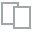
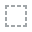
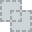
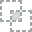
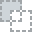
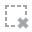
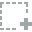
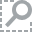
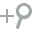
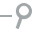
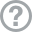
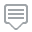
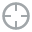
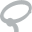
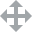
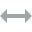
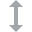
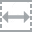
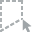
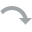
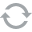
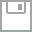
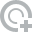
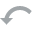
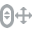
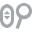
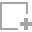
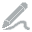
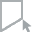
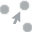
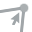
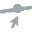

In [202]:
create_report(basef)

##### Variables con demasiados NA

In [203]:
porc_nas= basef.isnull().mean().reset_index(name='Porc_na')
porc_nas.sort_values('Porc_na', ascending= True)

index  Porc_na
0                           ocid      0.0
22             procurementMethod      0.0
23      procurementMethodDetails      0.0
24       mainProcurementCategory      0.0
25                 awardCriteria      0.0
..                           ...      ...
33  enquiryPeriod_durationInDays      1.0
32   enquiryPeriod_maxExtentDate      1.0
31         enquiryPeriod_endDate      1.0
11            budget_description      1.0
54                      status_y      1.0

[84 rows x 2 columns]

### Seleccion de variables que van al modelo

- coeficiente correlación (Multicolinealidad)
- porcentaje de vacíos
- la cantidad de elementos únicos porque no se va a dejar una variable categórica con muchos únicos


In [244]:
var_eleg= ['value_amount', 'numberOfTenderers', 'mainProcurementCategory',
           'Num_Award', 'Sum_Award',
           'Byr_Num_ocid', 'Byr_Bdgt_Tot', 'Byr_TndrDurat_Mean',
           'Byr_NumTndr_Mean', 'Byr_Num_direct', 'Byr_Num_selective',
           'Byr_Num_D_BieServ',
           'ByrAwrd_Num_ocid', 'ByrAwrd_Bdgt_Tot', 'ByrAwrd_TndrDurat_Mean',
           'ByrAwrd_NumTndr_Mean', 'ByrAwrd_Num_direct', 'ByrAwrd_Num_selective',
           'ByrAwrd_Num_D_BieServ',
           'Porc_NumOcid_AwardByr', 'Porc_Amount_vs_Bdgt_AwardByr', 'Ratio_NumTndr_Mean_AwardByr',
           'Porc_direct_AwardByr',
          #  'Porc_selective_AwardByr',
           'Porc_D_BieServ_AwardByr']
var_id=['ocid', 'buyer_id','award_id']

In [245]:
var_id + var_eleg

['ocid',
 'buyer_id',
 'award_id',
 'value_amount',
 'numberOfTenderers',
 'mainProcurementCategory',
 'Num_Award',
 'Sum_Award',
 'Byr_Num_ocid',
 'Byr_Bdgt_Tot',
 'Byr_TndrDurat_Mean',
 'Byr_NumTndr_Mean',
 'Byr_Num_direct',
 'Byr_Num_selective',
 'Byr_Num_D_BieServ',
 'ByrAwrd_Num_ocid',
 'ByrAwrd_Bdgt_Tot',
 'ByrAwrd_TndrDurat_Mean',
 'ByrAwrd_NumTndr_Mean',
 'ByrAwrd_Num_direct',
 'ByrAwrd_Num_selective',
 'ByrAwrd_Num_D_BieServ',
 'Porc_NumOcid_AwardByr',
 'Porc_Amount_vs_Bdgt_AwardByr',
 'Ratio_NumTndr_Mean_AwardByr',
 'Porc_direct_AwardByr',
 'Porc_D_BieServ_AwardByr']

In [246]:
base_pred = basef[var_id + var_eleg].dropna()

In [247]:
train= base_pred[ var_eleg ]
train.shape

(1813, 24)

In [249]:
train

value_amount  numberOfTenderers mainProcurementCategory  Num_Award  \
128          26000.0                1.0                services        1.0   
154          64944.8                1.0                   goods        1.0   
179          10000.0                1.0                services        1.0   
234          18500.0                1.0                services        1.0   
235          47245.4                1.0                services        1.0   
...              ...                ...                     ...        ...   
196168       16331.2                1.0                   goods       29.0   
196169       16331.2                1.0                   goods       29.0   
196176       57820.0                1.0                   goods        1.0   
196177      122807.0                1.0                services        1.0   
196375       42400.0                1.0                services        1.0   

        Sum_Award  Byr_Num_ocid  Byr_Bdgt_Tot  Byr_TndrDurat_Mean  \
128       26000.0         366.0   68340210.02           13.738462   
154       64944.8         366.0   68340210.02           13.738462   
179       10000.0         366.0   68340210.02           13.738462   
234       18500.0         366.0   68340210.02           13.738462   
235       47245.4         366.0   68340210.02           13.738462   
...           ...           ...           ...                 ...   
196168    16331.2           2.0      16331.20            4.000000   
196169    16331.2           2.0      16331.20            4.000000   
196176    57820.0           7.0     180627.00            5.000000   
196177   122807.0           7.0     180627.00            5.000000   
196375    42400.0           1.0      42400.00            4.000000   

        Byr_NumTndr_Mean  Byr_Num_direct  ...  ByrAwrd_TndrDurat_Mean  \
128             7.888889            60.0  ...                     7.0   
154             7.888889            60.0  ...                     7.0   
179             7.888889            60.0  ...                     6.0   
234             7.888889            60.0  ...                     6.0   
235             7.888889            60.0  ...                     6.0   
...                  ...             ...  ...                     ...   
196168          1.000000             1.0  ...                     4.0   
196169          1.000000             1.0  ...                     4.0   
196176          3.000000             2.0  ...                     5.0   
196177          3.000000             2.0  ...                     5.0   
196375          1.000000             1.0  ...                     4.0   

        ByrAwrd_NumTndr_Mean  ByrAwrd_Num_direct  ByrAwrd_Num_selective  \
128                      1.0                 1.0                    0.0   
154                      1.0                 1.0                    0.0   
179                      1.0                 1.0                    0.0   
234                      1.0                 1.0                    0.0   
235                      1.0                 1.0                    0.0   
...                      ...                 ...                    ...   
196168                   1.0                 1.0                    0.0   
196169                   1.0                 1.0                    0.0   
196176                   1.0                 1.0                    0.0   
196177                   1.0                 1.0                    0.0   
196375                   1.0                 1.0                    0.0   

        ByrAwrd_Num_D_BieServ  Porc_NumOcid_AwardByr  \
128                       1.0               0.002732   
154                       1.0               0.002732   
179                       1.0               0.002732   
234                       1.0               0.002732   
235                       1.0               0.002732   
...                       ...                    ...   
196168                    1.0               0.500000   
196169          

# MODELOS

In [250]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## Preprocesamiento

In [304]:
categorical_columns = ['mainProcurementCategory' ]

numerical_columns = var_eleg= [
    # 'value_amount',
    'numberOfTenderers',
           'Num_Award', 'Sum_Award',
                              #  'MaxDuration',
          #  'Byr_Num_ocid',
                               'Byr_Bdgt_Tot', 'Byr_TndrDurat_Mean',
           'Byr_NumTndr_Mean',
                              #  'Byr_Num_direct', 'Byr_Num_selective',
          #  'Byr_Num_D_BieServ',
           'ByrAwrd_Num_ocid', 'ByrAwrd_Bdgt_Tot', 'ByrAwrd_TndrDurat_Mean',
           'ByrAwrd_NumTndr_Mean', 'ByrAwrd_Num_direct', 'ByrAwrd_Num_selective',
           'ByrAwrd_Num_D_BieServ',
           'Porc_NumOcid_AwardByr', 'Porc_Amount_vs_Bdgt_AwardByr', 'Ratio_NumTndr_Mean_AwardByr',
           'Porc_direct_AwardByr',
                              #  'Porc_selective_AwardByr',
                               'Porc_D_BieServ_AwardByr']

## Isolation Forest

In [305]:
prep = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns),
                   ('scaler', StandardScaler(),numerical_columns),],
                  remainder= 'drop')


In [306]:
ifrst_pipe = Pipeline([('preproc', prep),
                     ('ifrst', IsolationForest(n_estimators= 200, random_state=123)  )
                  ])

In [307]:
ifrst_pipe.fit(train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['mainProcurementCategory']),
                                                 ('scaler', StandardScaler(),
                                                  ['numberOfTenderers',
                                                   'Num_Award', 'Sum_Award',
                                                   'Byr_Bdgt_Tot',
                                                   'Byr_TndrDurat_Mean',
                                                   'Byr_NumTndr_Mean',
                                                   'ByrAwrd_Num_ocid',
                                                   'ByrAwrd_Bdgt_Tot',
                                                   'ByrAwrd_TndrDurat_Mean',
                                                   'ByrAwrd_NumTndr_Mean',
                                                   'ByrAwrd_Num_direct',
                                                   'ByrAwrd_Num_selective',
                                                   'ByrAwrd_Num_D_BieServ',
                                                   'Porc_NumOcid_AwardByr',
                                                   'Porc_Amount_vs_Bdgt_AwardByr',
                                                   'Ratio_NumTndr_Mean_AwardByr',
                                                   'Porc_direct_AwardByr',
                                                   'Porc_D_BieServ_AwardByr'])])),
                ('ifrst', IsolationForest(n_estimators=200, random_state=123))])

In [308]:
base_pred.shape

(1813, 32)

In [309]:
y_pred_ifrst= ifrst_pipe.predict( base_pred )

In [310]:
np.unique(y_pred_ifrst, return_counts=True)

(array([-1,  1]), array([ 218, 1595]))

In [311]:
base_pred['y_pred_ifrst']= y_pred_ifrst

##### Descriptivas por anomalia y no anomalia

In [312]:
base_pred.groupby('y_pred_ifrst').mean()

<ipython-input-312-796909283d77>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_pred.groupby('y_pred_ifrst').mean()


value_amount  numberOfTenderers  Num_Award      Sum_Award  \
y_pred_ifrst                                                               
-1            438662.882532                1.0   5.844037  438585.639541   
 1             64264.557249                1.0   1.209404   64222.207444   

              Byr_Num_ocid  Byr_Bdgt_Tot  Byr_TndrDurat_Mean  \
y_pred_ifrst                                                   
-1              157.220183  2.629745e+07            9.020281   
 1              154.957994  1.307522e+07            7.900554   

              Byr_NumTndr_Mean  Byr_Num_direct  Byr_Num_selective  ...  \
y_pred_ifrst                                                       ...   
-1                    7.817047       21.830275          13.412844  ...   
 1                    3.294712       22.588715           9.584326  ...   

              ByrAwrd_Num_D_BieServ  Porc_NumOcid_AwardByr  \
y_pred_ifrst                                                 
-1                              1.0               0.211290   
 1                              1.0               0.019678   

              Porc_Amount_vs_Bdgt_AwardByr  Ratio_NumTndr_Mean_AwardByr  \
y_pred_ifrst                                                              
-1                                0.239363                     0.520163   
 1                                0.039627                     0.374409   

              Porc_direct_AwardByr  Porc_D_BieServ_AwardByr  y_pred_lof  \
y_pred_ifrst                                                              
-1                        0.565085                 0.672101    0.559633   
 1                        0.104731                 0.229132    0.938558   

                 pca_1     pca_2     pca_3  
y_pred_ifrst                                
-1           -1.313404  2.414535 -1.909568  
 1            0.179512 -0.330012  0.260994  

[2 rows x 27 columns]

## Local outlier Factor

In [313]:
lof_pipe = Pipeline([('preproc', prep),
                     ('lof', LocalOutlierFactor(n_neighbors= 50, novelty=True)  )
                  ])

In [314]:
lof_pipe.fit(train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['mainProcurementCategory']),
                                                 ('scaler', StandardScaler(),
                                                  ['numberOfTenderers',
                                                   'Num_Award', 'Sum_Award',
                                                   'Byr_Bdgt_Tot',
                                                   'Byr_TndrDurat_Mean',
                                                   'Byr_NumTndr_Mean',
                                                   'ByrAwrd_Num_ocid',
                                                   'ByrAwrd_Bdgt_Tot',
                                                   'ByrAwrd_TndrDurat_Mean',
                                                   'ByrAwrd_NumTndr_Mean',
                                                   'ByrAwrd_Num_direct',
                                                   'ByrAwrd_Num_selective',
                                                   'ByrAwrd_Num_D_BieServ',
                                                   'Porc_NumOcid_AwardByr',
                                                   'Porc_Amount_vs_Bdgt_AwardByr',
                                                   'Ratio_NumTndr_Mean_AwardByr',
                                                   'Porc_direct_AwardByr',
                                                   'Porc_D_BieServ_AwardByr'])])),
                ('lof', LocalOutlierFactor(n_neighbors=50, novelty=True))])

In [315]:
y_pred_lof= lof_pipe.predict( base_pred )

In [316]:
np.unique(y_pred_lof, return_counts=True)

(array([-1,  1]), array([ 140, 1673]))

In [317]:
base_pred['y_pred_lof']= y_pred_lof

##### Descriptivas por anomalia y no anomalia

In [318]:
base_pred.groupby('y_pred_lof').mean()

<ipython-input-318-48b94811e4bc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_pred.groupby('y_pred_lof').mean()


value_amount  numberOfTenderers  Num_Award      Sum_Award  \
y_pred_lof                                                               
-1          686250.095393                1.0   1.264286  686145.121607   
 1           61001.472714                1.0   1.808727   60959.816657   

            Byr_Num_ocid  Byr_Bdgt_Tot  Byr_TndrDurat_Mean  Byr_NumTndr_Mean  \
y_pred_lof                                                                     
-1            170.757143  2.205216e+07            8.866494         10.564096   
 1            153.930663  1.404693e+07            7.965628          3.275678   

            Byr_Num_direct  Byr_Num_selective  ...  ByrAwrd_Num_D_BieServ  \
y_pred_lof                                     ...                          
-1               27.392857          12.492857  ...                    1.0   
 1               22.087866           9.839809  ...                    1.0   

            Porc_NumOcid_AwardByr  Porc_Amount_vs_Bdgt_AwardByr  \
y_pred_lof                                                        
-1                       0.098921                      0.179711   
 1                       0.038015                      0.053931   

            Ratio_NumTndr_Mean_AwardByr  Porc_direct_AwardByr  \
y_pred_lof                                                      
-1                             0.433400              0.218026   
 1                             0.388465              0.155236   

            Porc_D_BieServ_AwardByr  y_pred_ifrst     pca_1     pca_2  \
y_pred_lof                                                              
-1                         0.336642     -0.042857  0.535440  2.154913   
 1                         0.277856      0.826659 -0.044807 -0.180327   

               pca_3  
y_pred_lof            
-1         -0.141926  
 1          0.011877  

[2 rows x 27 columns]

## Graficar con PCA

In [319]:
from sklearn.decomposition import PCA

In [320]:
pca_pipe = Pipeline([('preproc', prep),
                     ('pca', PCA(n_components=3)  )
                  ])

In [321]:
pca_pipe.fit(train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['mainProcurementCategory']),
                                                 ('scaler', StandardScaler(),
                                                  ['numberOfTenderers',
                                                   'Num_Award', 'Sum_Award',
                                                   'Byr_Bdgt_Tot',
                                                   'Byr_TndrDurat_Mean',
                                                   'Byr_NumTndr_Mean',
                                                   'ByrAwrd_Num_ocid',
                                                   'ByrAwrd_Bdgt_Tot',
                                                   'ByrAwrd_TndrDurat_Mean',
                                                   'ByrAwrd_NumTndr_Mean',
                                                   'ByrAwrd_Num_direct',
                                                   'ByrAwrd_Num_selective',
                                                   'ByrAwrd_Num_D_BieServ',
                                                   'Porc_NumOcid_AwardByr',
                                                   'Porc_Amount_vs_Bdgt_AwardByr',
                                                   'Ratio_NumTndr_Mean_AwardByr',
                                                   'Porc_direct_AwardByr',
                                                   'Porc_D_BieServ_AwardByr'])])),
                ('pca', PCA(n_components=3))])

In [322]:
pca_calculado= pca_pipe.transform(train)

In [323]:
pca_calculado.shape

(1813, 3)

In [324]:
pca_calculado[:,0]

array([ 2.04997841,  2.01910698,  2.00428001, ..., -1.89006936,
       -2.47636524, -9.2402726 ])

In [325]:
base_pred['pca_1']= pca_calculado[:,0]

In [326]:
base_pred['pca_2']= pca_calculado[:,1]

In [327]:
base_pred['pca_3']= pca_calculado[:,2]

<Axes: xlabel='pca_1', ylabel='pca_2'>

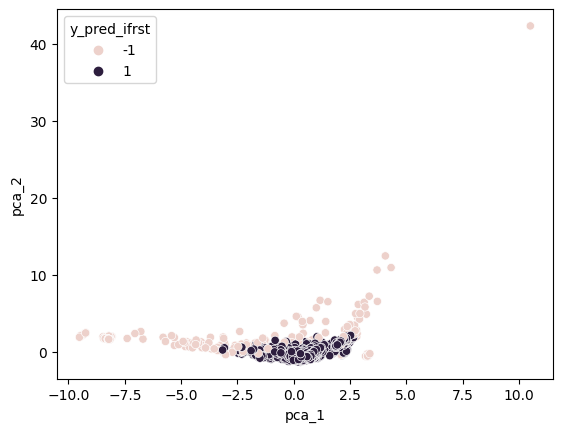

In [328]:
sns.scatterplot( base_pred, x='pca_1', y= 'pca_2', hue= 'y_pred_ifrst' )

<Axes: xlabel='pca_3', ylabel='pca_2'>

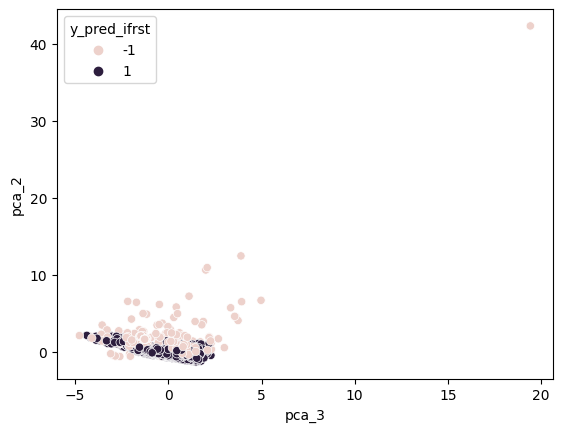

In [329]:
sns.scatterplot( base_pred, x='pca_3', y= 'pca_2', hue= 'y_pred_ifrst' )

<Axes: xlabel='pca_1', ylabel='pca_3'>

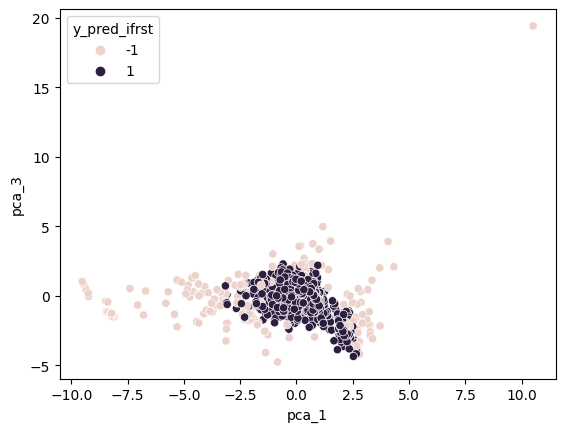

In [330]:
sns.scatterplot( base_pred, x='pca_1', y= 'pca_3', hue= 'y_pred_ifrst' )

Idea ganadora para el concurso hacer que la visualización sea interactiva y que permita saber qué OCID - AWARID - SUPPID están quedando como anómalo y su valores (incluso comparar con el resto)